## <center> Data Science Bootcamp by MLSA FAST PWR Project </center>

**<center> COVID-19 Data Analysis By Shehraz Sarwar </center>**

In [3]:
import pandas as pd

In [5]:
#load your dataset
import_data = pd.read_csv('country_wise_latest.csv')

In [7]:
#apply head
import_data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [9]:
#apply tail
import_data.tail(5)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa


In [11]:
#clean your data
# missing_values = import_data.isnull() DataFrame of True/False values showing where missing values are.
missing_values = import_data.isnull().values.any()
print(missing_values)
print((import_data == "").values.any())  # Returns True if there are empty strings
print((import_data == " ").values.any()) # Check for Spaces as Missing Values



False
False
False


In [13]:
#do statiscal analysis
import_data.describe().iloc[:, :7]


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000


In [15]:
#apply matplotlib and seaborn 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

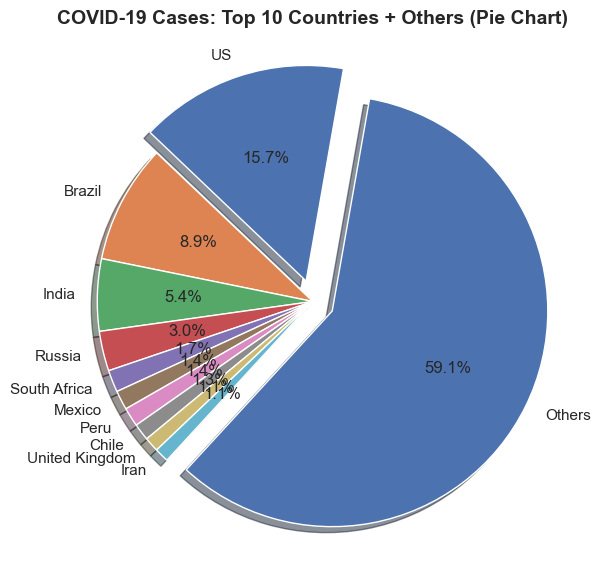

In [16]:
#show analysis u have done
# x = import_data['Country/Region']
# y = import_data['Confirmed']

# Pie Chart
# plt.pie(y, labels=x, radius=1.2,autopct='%0.01f%%', shadow=True, explode=[0.05] * len(x))
# Bar chart
# plt.xlabel('Country/Region', fontsize=18)
# plt.ylabel('Confirmed Cases', fontsize=16)
# plt.bar(x, y)

# Select the Top 10 countries with the highest confirmed cases
top_10 = import_data.nlargest(10, 'Confirmed').copy()

# Sum of all remaining countries
others = import_data.iloc[10:]['Confirmed'].sum()

# Add "Others" category properly
others_row = pd.DataFrame({'Country/Region': ['Others'], 'Confirmed': [others]})

# Append "Others" to the DataFrame
top_10 = pd.concat([top_10, others_row], ignore_index=True)

# Extract country names and confirmed cases
country_labels = top_10['Country/Region'].tolist()
confirmed_cases = top_10['Confirmed'].tolist()

# PIE CHART
# Increase the x and y axis to view properly

plt.figure(figsize=(7, 7))  # Set figure size for pie chart

plt.pie(confirmed_cases, labels=country_labels, 
        autopct='%0.1f%%', shadow=True, startangle=80, 
        explode=[0.1] + [0] * 9 + [0.1])  # Separate first country & "Others"

# Add title
plt.title("COVID-19 Cases: Top 10 Countries + Others (Pie Chart)", fontsize=14, fontweight='bold')

# Show pie chart
plt.show()



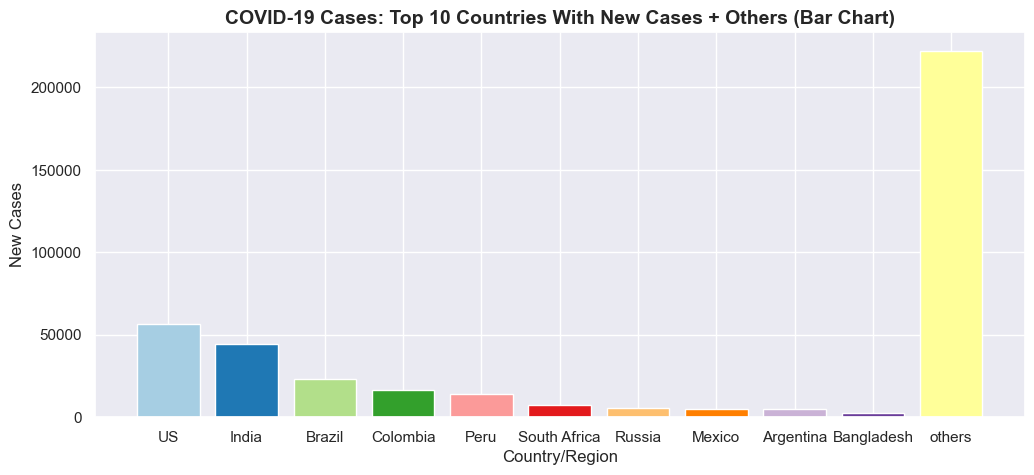

In [27]:
# BAR CHART
# Select the Top 10 countries with the highest New cases reported
top__10 = import_data.nlargest(10, 'New cases').copy()

# Sum of all remaining countries
others_ = import_data.iloc[10:]['New cases'].sum()

# Add "Others" category properly
others__row = pd.DataFrame({'Country/Region': ['others'], 'New cases': [others_]})

# Append "Others" to the DataFrame
top__10 = pd.concat([top__10, others__row], ignore_index=True)

# Extract country names and confirmed cases
country_labels = top__10['Country/Region'].tolist()
new_cases = top__10['New cases'].tolist()


plt.figure(figsize=(12, 5))  # Set figure size for bar chart
plt.bar(country_labels, new_cases, color=plt.cm.Paired.colors)  # Create bar chart

# Add labels and title
plt.xlabel("Country/Region", fontsize=12)
plt.ylabel("New Cases", fontsize=12)
plt.title("COVID-19 Cases: Top 10 Countries With New Cases + Others (Bar Chart)", fontsize=14, fontweight='bold')

# Show bar chart
plt.show()

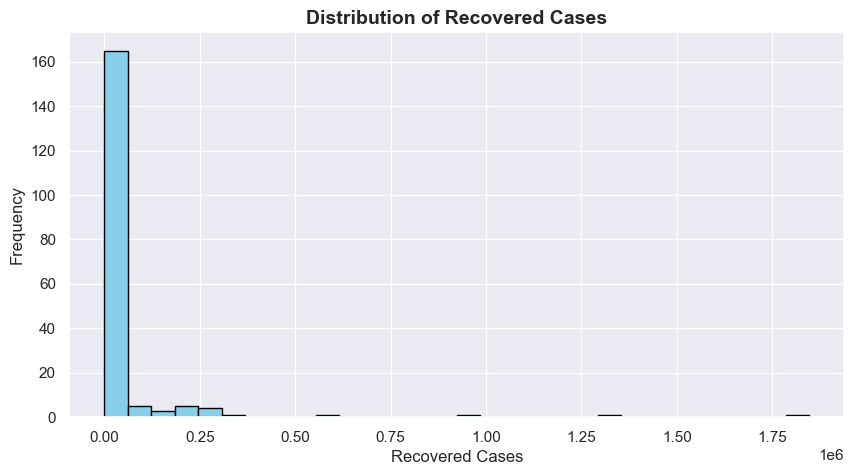

In [23]:
plt.figure(figsize=(10, 5))  # Set figure size

# Create histogram with custom color
plt.hist(import_data['Recovered'], bins=30, color='skyblue', edgecolor='black', alpha=1.0)

# Add labels and title
plt.xlabel("Recovered Cases", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Recovered Cases", fontsize=14, fontweight='bold')

# Show plot
plt.show()

### **COVID-19 Data Analysis Summary**  

#### **Key Statistics:**  
- **Average Confirmed Cases:** 88,130.94  
- **Average Deaths:** 3,497.52  
- **Average Recoveries:** 50,631.48  
- **Highest Death Toll:** **USA** with **148,011 deaths**  

#### **Top 10 Countries by Confirmed Cases:**  
1️⃣ **USA**  
2️⃣ **Brazil**  
3️⃣ **India**  
4️⃣ **Russia**  
5️⃣ **South Africa**  
6️⃣ **Mexico**  
7️⃣ **Peru**  
8️⃣ **Chile**  
9️⃣ **United Kingdom**  
🔟 **Iran**  

This analysis provides a clear view of how COVID-19 impacted different countries, highlighting the most affected regions. 🚨

My Linkedin Profile: https://www.linkedin.com/in/shehraz-sarwar-321394247/
